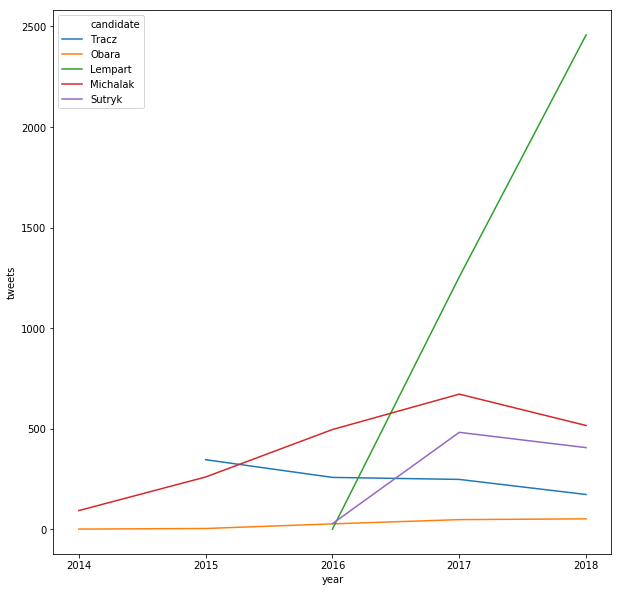

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns

'''
Wydobywanie danych z plików csv za pomocą pakietu pandas do postaci obiektu DataFrame.
'''
dataTracz = pd.read_csv('D:\IT\AnalysisList\\tweets_GoTracz.csv')
dataObara = pd.read_csv('D:\IT\AnalysisList\\tweets_KatarzynaObara.csv')
dataLempart = pd.read_csv('D:\IT\AnalysisList\\tweets_martalempart.csv')
dataMichalak = pd.read_csv('D:\IT\AnalysisList\\tweets_MichalakJerzy.csv')
dataSutryk = pd.read_csv('D:\IT\AnalysisList\\tweets_SutrykJacek.csv')
'''
W ramach zadania agregowane są na przestrzeni lat polubienia i retweety.
'''


def get_grouped_data(df: pd.DataFrame, candidate):
    df['year'] = df['date'].apply(lambda x: str(x)[0:4]) 
    df = df.groupby(['year']).agg({'id': 'count', 'retweets': 'sum', 'likes': 'sum'})
    df = df.reset_index()
    df['year'] = df['year'].apply(int)
    df = df.rename(columns={'id': 'tweets'})
    df['tweets'] = df['tweets'].apply(int)
    df = df.assign(candidate=candidate)
    return df


tweets_tracz = get_grouped_data(dataTracz, 'Tracz')
tweets_obara = get_grouped_data(dataObara, 'Obara')
tweets_lempart = get_grouped_data(dataLempart, 'Lempart')
tweets_michalak = get_grouped_data(dataMichalak, 'Michalak')
tweets_sutryk = get_grouped_data(dataSutryk, 'Sutryk')
tweets = pd.concat([tweets_tracz, tweets_obara, tweets_lempart, tweets_michalak, tweets_sutryk])
'''
Liczba tweetów na przestrzeni lat
'''
plt.figure(figsize=(10,10))
plt.xticks(np.arange(2014, 2019, step=1))
sns.lineplot(x='year', y='tweets', hue='candidate', data=tweets)

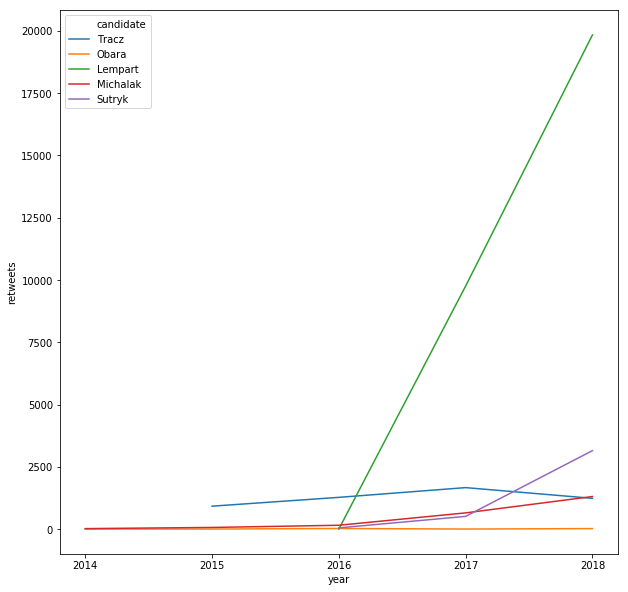

In [49]:
'''
Liczba retweetów na przestrzeni lat
'''
plt.figure(figsize=(10,10))
plt.xticks(np.arange(2014, 2019, step=1))
sns.lineplot(x='year', y='retweets', hue='candidate', data=tweets)

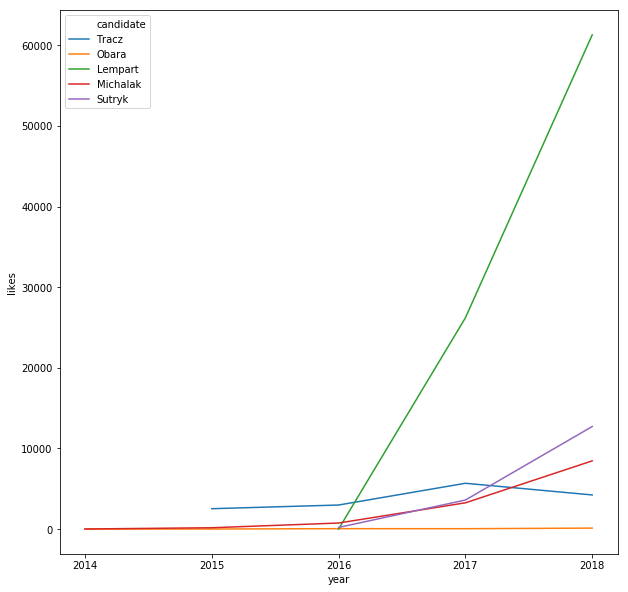

In [50]:
'''
Popularność tweetów (względem like'ów)
'''
plt.figure(figsize=(10,10))
plt.xticks(np.arange(2014, 2019, step=1))
sns.lineplot(x='year', y='likes', hue='candidate', data=tweets)

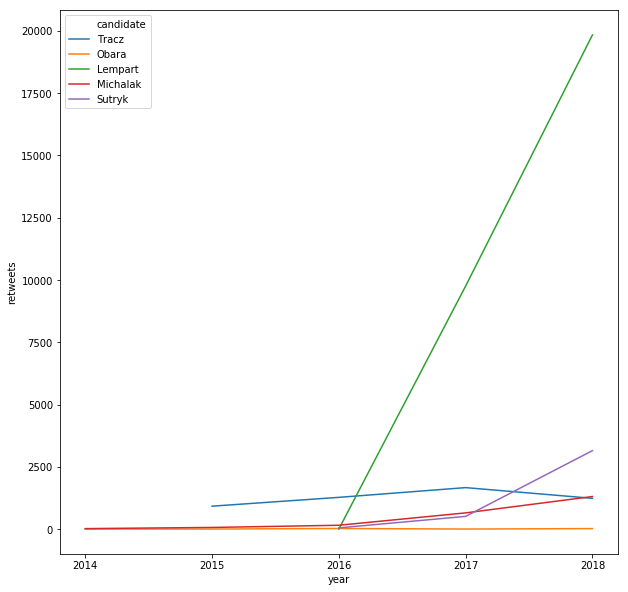

In [51]:
'''
Popularność tweetów (względem retweet'ów)
'''
plt.figure(figsize=(10,10))
plt.xticks(np.arange(2014, 2019, step=1))
sns.lineplot(x='year', y='retweets', hue='candidate', data=tweets)

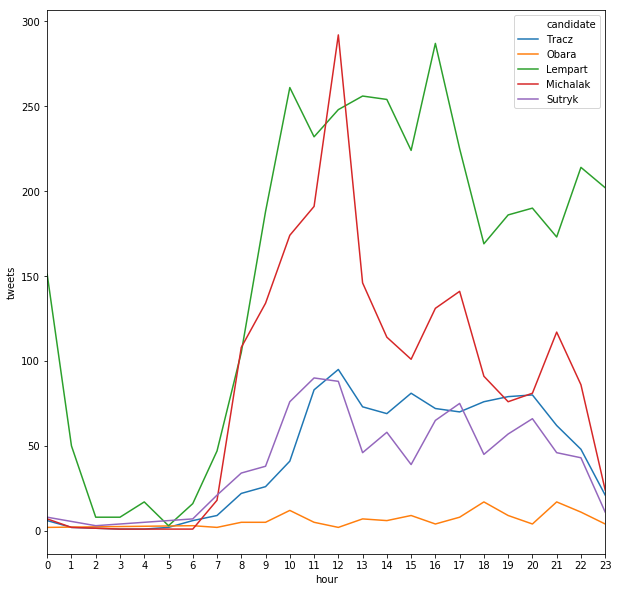

In [52]:
def get_grouped_data_on_hourly_basis(df: pd.DataFrame, candidate):
    df['hour'] = df['time'].apply(lambda x: str(x)[0:2]) 
    df = df.groupby(['hour']).agg({'id': 'count', 'retweets': 'sum'})
    df = df.reset_index()
    df['hour'] = df['hour'].apply(int)
    df = df.rename(columns={'id': 'tweets'})
    df['tweets'] = df['tweets'].apply(int)
    df = df.assign(candidate=candidate)
    return df

import numpy as np
tweets_tracz = get_grouped_data_on_hourly_basis(dataTracz, 'Tracz')
tweets_obara = get_grouped_data_on_hourly_basis(dataObara, 'Obara')
tweets_lempart = get_grouped_data_on_hourly_basis(dataLempart, 'Lempart')
tweets_michalak = get_grouped_data_on_hourly_basis(dataMichalak, 'Michalak')
tweets_sutryk = get_grouped_data_on_hourly_basis(dataSutryk, 'Sutryk')
tweets = pd.concat([tweets_tracz, tweets_obara, tweets_lempart, tweets_michalak, tweets_sutryk])
'''
Tweeting activities on hourly basis
'''
plt.figure(figsize=(10,10))
plt.xticks(np.arange(0, 24, step=1))
plt.xlim(0,23)
sns.lineplot(x='hour', y='tweets', hue='candidate', data=tweets)

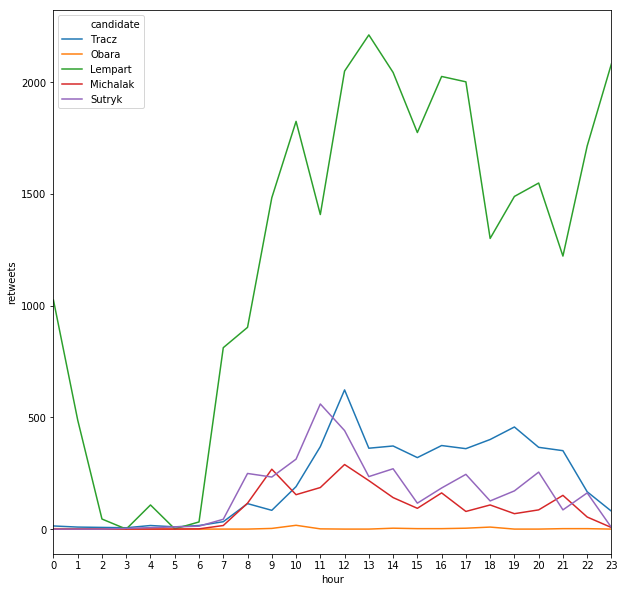

In [53]:
'''
Retweeting activities on hourly basis
'''
plt.figure(figsize=(10,10))
plt.xticks(np.arange(0, 24, step=1))
plt.xlim(0,23)
sns.lineplot(x='hour', y='retweets', hue='candidate', data=tweets)

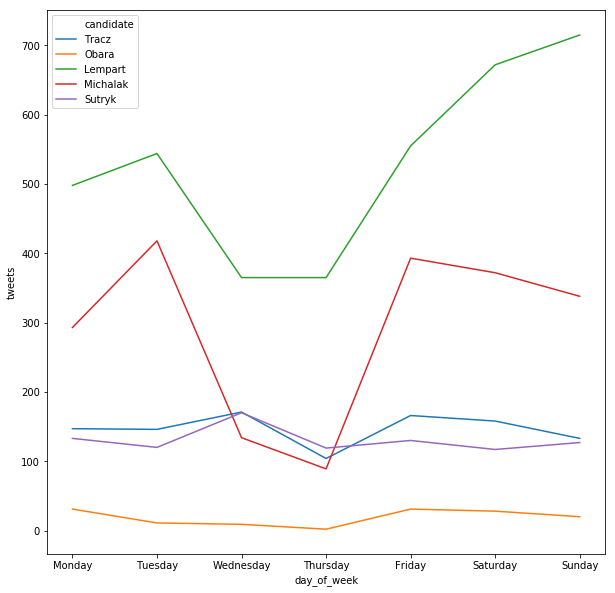

In [42]:
import datetime
days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_grouped_data_on_daily_basis(df: pd.DataFrame, candidate):
    df['day_of_week'] = df['date'].apply(lambda x: days[datetime.datetime(
        int(x.split('-')[0]), int(x.split('-')[1]), int(x.split('-')[2])
    ).weekday()])
    df = df.groupby(['day_of_week']).agg({'id': 'count', 'retweets': 'sum'})
    df = df.reset_index()
    df = df.rename(columns={'id': 'tweets'})
    df['tweets'] = df['tweets'].apply(int)
    df = df.assign(candidate=candidate)
    return df

import numpy as np
tweets_tracz = get_grouped_data_on_daily_basis(dataTracz, 'Tracz')
tweets_obara = get_grouped_data_on_daily_basis(dataObara, 'Obara')
tweets_lempart = get_grouped_data_on_daily_basis(dataLempart, 'Lempart')
tweets_michalak = get_grouped_data_on_daily_basis(dataMichalak, 'Michalak')
tweets_sutryk = get_grouped_data_on_daily_basis(dataSutryk, 'Sutryk')
tweets = pd.concat([tweets_tracz, tweets_obara, tweets_lempart, tweets_michalak, tweets_sutryk])
plt.figure(figsize=(10,10))
plt.xticks([0, 1, 2, 3, 4, 5, 6], days)
sns.lineplot(x='day_of_week', y='tweets', hue='candidate', data=tweets)

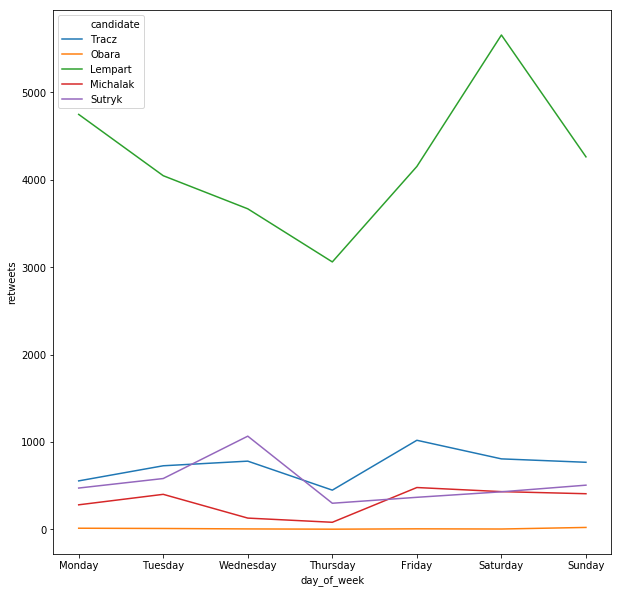

In [43]:
plt.figure(figsize=(10,10))
plt.xticks([0, 1, 2, 3, 4, 5, 6], days)
sns.lineplot(x='day_of_week', y='retweets', hue='candidate', data=tweets)

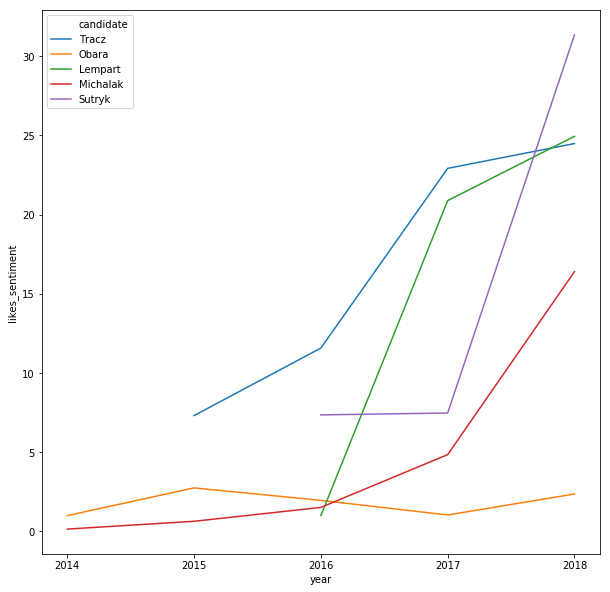

In [44]:
'''
Tweet sentiment in time
'''
def get_grouped_data_with_average(df: pd.DataFrame, candidate):
    df['year'] = df['date'].apply(lambda x: str(x)[0:4]) 
    df = df.groupby(['year']).agg({'id': 'count', 'retweets': 'mean', 'likes': 'mean'})
    df = df.reset_index()
    df['year'] = df['year'].apply(int)
    df = df.rename(columns={'id': 'tweets', 'retweets': 'retweets_sentiment', 'likes': 'likes_sentiment'})
    df['tweets'] = df['tweets'].apply(int)
    df = df.assign(candidate=candidate)
    return df


tweets_tracz = get_grouped_data_with_average(dataTracz, 'Tracz')
tweets_obara = get_grouped_data_with_average(dataObara, 'Obara')
tweets_lempart = get_grouped_data_with_average(dataLempart, 'Lempart')
tweets_michalak = get_grouped_data_with_average(dataMichalak, 'Michalak')
tweets_sutryk = get_grouped_data_with_average(dataSutryk, 'Sutryk')
tweets = pd.concat([tweets_tracz, tweets_obara, tweets_lempart, tweets_michalak, tweets_sutryk])
plt.figure(figsize=(10,10))
plt.xticks(np.arange(2014, 2019, step=1))
sns.lineplot(x='year', y='likes_sentiment', hue='candidate', data=tweets)

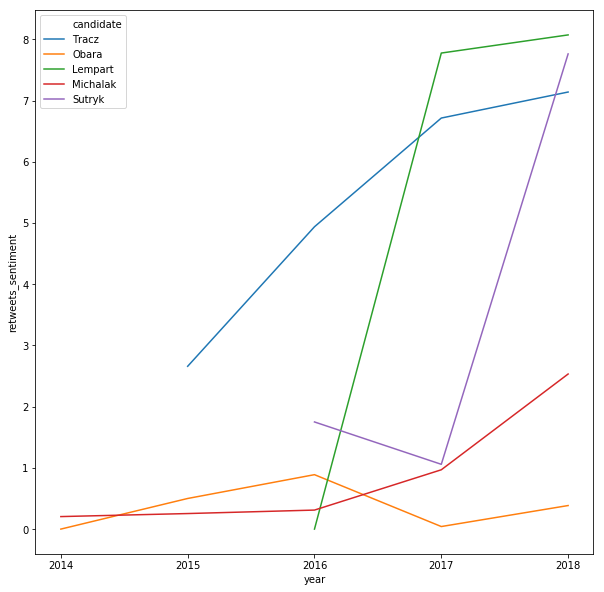

In [45]:
plt.figure(figsize=(10,10))
plt.xticks(np.arange(2014, 2019, step=1))
sns.lineplot(x='year', y='retweets_sentiment', hue='candidate', data=tweets)